In [11]:
include("LiPoSID.jl")
using Plots
Plots.plotlyjs()

using QuantumOptics
basis = NLevelBasis(2)

WebIO._IJuliaInit()

NLevel(N=2)

In [10]:
import Pkg; Pkg.add("PlotlyJS")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed Hiccup ──────────────── v0.2.2
   Installed AssetRegistry ───────── v0.1.0
   Installed Pidfile ─────────────── v1.3.0
   Installed Kaleido_jll ─────────── v0.2.1+0
   Installed Mustache ────────────── v1.0.17
   Installed WebSockets ──────────── v1.6.0
   Installed PlotlyBase ──────────── v0.8.19
   Installed Blink ───────────────── v0.12.8
   Installed PlotlyJS ────────────── v0.18.10
   Installed WebIO ───────────────── v0.8.21
   Installed JSExpr ──────────────── v0.5.4
   Installed FunctionalCollections ─ v0.5.0
   Installed Mux ─────────────────── v1.0.1
    Updating `~/.julia/environments/v1.9/Project.toml`
  [f0f68f2c] + PlotlyJS v0.18.10
    Updating `~/.julia/environments/v1.9/Manifest.toml`
  [bf4720bc] + AssetRegistry v0.1.0
  [ad839575] + Blink v0.12.8
  [de31a74c] + FunctionalCollections v0.5.0
  [9fb69e20] + Hiccup v0.2.2
  [97c1335a] + JSExpr v0.5.4
  [ffc61752] + M

In [12]:
function xyz(b)
    x = b[1, :]
    y = b[2, :]
    z = b[3, :]
    return x,y,z
end

xyz (generic function with 1 method)

In [13]:
γ = "0.079477"

"0.079477"

In [14]:
ρ, t = LiPoSID.get_rho_series("DATA/State_B3_2CUT_data.h5", γ)
b = LiPoSID.bloch(ρ)
t_steps = length(ρ)
t = convert(Vector{Float64}, t)
ρ₀ = DenseOperator(basis,ρ[1])

Operator(dim=2x2)
  basis: NLevel(N=2)
  0.501058+0.0im       0.0320328-0.497881im
 0.0320328+0.497881im   0.498942+0.0im

In [15]:
using HDF5

In [16]:
function get_by_name(file_name, gamma, operator_name)
    h5open(file_name,"r") do fid # read file, preserve existing contents
        operator = read(fid["gamma_"*gamma][operator_name])
        return(operator)
    end
end


get_by_name (generic function with 1 method)

In [17]:
dir = "/home/zah/github/POP23/MODELS/"

models_file = "POP_NoRmLME_trn4_gap_fix-Phi-up_2023-Aug-07_at_16-29.h5"


A = get_by_name(dir*models_file, γ, "A_sid_exact")
H = get_by_name(dir*models_file, γ, "H_sid_exact")


tᵖᵒᵖ, ρᵖᵒᵖ = timeevolution.master(t, ρ₀, DenseOperator(basis,H), [DenseOperator(basis,A)])
ρᵖᵒᵖ = [convert(Matrix{ComplexF64}, ρᵢ.data) for ρᵢ in ρᵖᵒᵖ]
bᵖᵒᵖ = LiPoSID.bloch(ρᵖᵒᵖ);


In [18]:
models_file = "POP_RmLME_trn4_gap_fix-Phi-up_2023-Aug-07_at_19-32.h5"

Aᴿᴹ = get_by_name(dir*models_file, γ, "A_sid_exact")
Hᴿᴹ = get_by_name(dir*models_file, γ, "H_sid_exact")

tᴿᴹ, ρᴿᴹ = timeevolution.master(t, ρ₀, DenseOperator(basis,Hᴿᴹ), [DenseOperator(basis,Aᴿᴹ)])
ρᴿᴹ = [convert(Matrix{ComplexF64}, ρᵢ.data) for ρᵢ in ρᴿᴹ];
bᴿᴹ = LiPoSID.bloch(ρᴿᴹ);

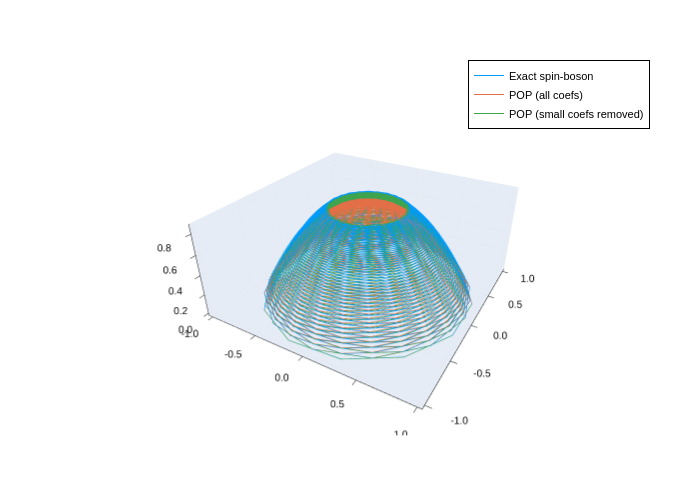

In [19]:
plt = Plots.plot(xyz(b), label = "Exact spin-boson")
plt = Plots.plot!(xyz(bᵖᵒᵖ), label = "POP (all coefs)")
plt = Plots.plot!(xyz(bᴿᴹ), label = "POP (small coefs removed)")

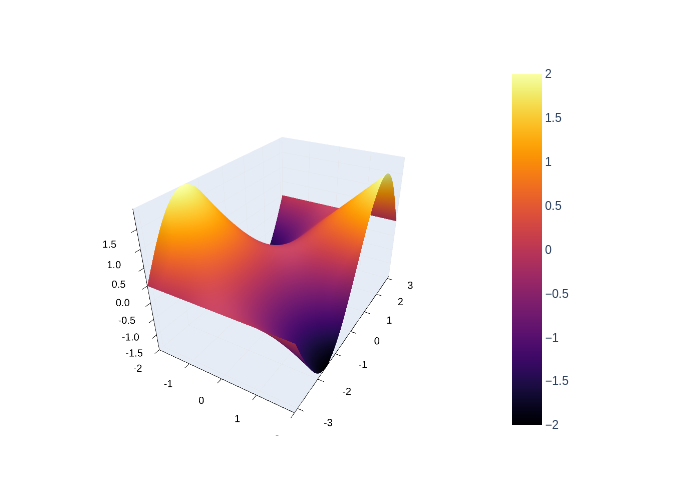

In [21]:
xs = range(-1, stop=1, length=100)
ys = range(-1, stop=1, length=100)
f(x,y) = x*sin(y)
surface(xs, ys, f)

In [35]:
using Plots; plotlyjs()

function sphere(r, C)   # r: radius; C: center [cx,cy,cz]
    n = 100
    u = range(-π, π; length = n)
    v = range(0, π; length = n)
    x = C[1] .+ r*cos.(u) * sin.(v)'
    y = C[2] .+ r*sin.(u) * sin.(v)'
    z = C[3] .+ r*ones(n) * cos.(v)'
    return x, y, z
end

p = surface(sphere(2, [1,2,3]), c=cgrad(:plasma, rev=true))
#savefig(p, "sphere","pdf", width=500, height=500, scale=0.5)
savefig(p, "sphere.pdf")

"/home/zah/github/POP23/sphere.pdf"

In [36]:
plt = surface(sphere(1, [0,0,0]), alpha=0.5, c=cgrad(:plasma, rev=true))
plt = Plots.plot!(xyz(b), label = "Exact spin-boson")
plt = Plots.plot!(xyz(bᵖᵒᵖ), label = "POP (all coefs)")
plt = Plots.plot!(xyz(bᴿᴹ), label = "POP (small coefs removed)")
savefig(plt, "Trajectory_in_Bloch.pdf")

"/home/zah/github/POP23/Trajectory_in_Bloch.pdf"